In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load and check data

In [63]:
data = pd.read_csv('Amazon_reviews.csv',index_col=0)
data.head()

,Rating,Title,Review,Review_Date
0,4.0,Average phone,I am writing this review after seven days of u...,24 April 2023
1,4.0,Good Phone and big Phone,The Phone is very good at this price point no ...,22 April 2023
2,4.0,Ram is not expandable upto 8gn,The varient which i got is it only have 4 gb o...,19 April 2023
3,4.0,Prompt response,Product is meets with the all the expectation ...,22 April 2023
4,4.0,Very good,"Product is very good , but you have to comprom...",25 April 2023


## Exploratory data analysis

In [64]:
data.shape

(50, 4)

In [65]:
data['Rating'].value_counts()

4.0    44
3.0     5
5.0     1
Name: Rating, dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

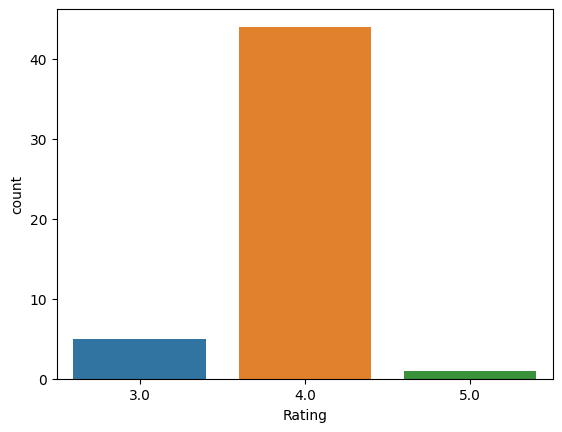

In [66]:
sns.countplot(x=data['Rating'])

In [67]:
# Number of words
data['word_count'] = data['Review'].apply(lambda x: len(str(x).split(" ")))
# Number of characters
data['char_count'] = data['Review'].str.len() 
# Number of stop words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['stopwords'] = data['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
# Number of special characters
data['spl_character'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

data.head()

,Rating,Title,Review,Review_Date,word_count,char_count,stopwords,spl_character
0,4.0,Average phone,I am writing this review after seven days of u...,24 April 2023,64,337,19,3
1,4.0,Good Phone and big Phone,The Phone is very good at this price point no ...,22 April 2023,39,228,11,0
2,4.0,Ram is not expandable upto 8gn,The varient which i got is it only have 4 gb o...,19 April 2023,45,246,21,1
3,4.0,Prompt response,Product is meets with the all the expectation ...,22 April 2023,24,144,13,0
4,4.0,Very good,"Product is very good , but you have to comprom...",25 April 2023,17,96,9,0


In [68]:
data.drop(['word_count','char_count','stopwords','spl_character'],axis=1,inplace=True)

## Preprocessing and visualiation

In [30]:
# Spelling correction
from textblob import TextBlob
data['Review'][:].apply(lambda x: str(TextBlob(x).correct()))

0     I am writing this review after seven days of u...
1     The Shone is very good at this price point no ...
2     The variant which i got is it only have 4 go o...
3     Product is meets with the all the expectation ...
4     Product is very good , but you have to comprom...
5     It got it at 7.k and it's good for this price....
6                                                     K
7     Had this phone for about 2-3 day and here is m...
8     he mobile has a very decent speed. Value for m...
9                            Good low budget smartphone
10                        Vice product for Budget price
11                                      Average product
12    Volume buttons are so small. Both are inconven...
13                                                 Good
14                               Face clock is not good
15                                                 Good
16                           Vice mobile for this price
17                                         Does 

In [69]:
import re
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text 

data['Review_Date'] = np.vectorize(remove_pattern)(data['Review_Date'], "Reviewed in India 🇮🇳 on[\w]*")
data.tail()


,Rating,Title,Review,Review_Date
45,4.0,Good,The media could not be loaded.\n ...,10 April 2023
46,4.0,Samsung galaxy m04,Mid range smartphoneIts for normal use,21 March 2023
47,4.0,Worst camera it looks like VGA camera.,"Phone is good, but the camera is worst ever, i...",24 March 2023
48,5.0,Just go for it!!,It is way beyond just a simple Android phone f...,8 April 2023
49,3.0,Slow though but it is Samsung brand has inhere...,Color awesomeScreen awesomeProcessing not at P...,1 February 2023


In [70]:
data['Review_Date']

0        24 April 2023
1        22 April 2023
2        19 April 2023
3        22 April 2023
4        25 April 2023
5        10 April 2023
6        23 April 2023
7        18 April 2023
8        16 April 2023
9        23 April 2023
10       21 April 2023
11       19 April 2023
12       13 April 2023
13       19 April 2023
14       15 April 2023
15       16 April 2023
16       14 April 2023
17       14 April 2023
18       19 April 2023
19       12 April 2023
20        9 April 2023
21       12 April 2023
22    22 December 2022
23        8 April 2023
24       11 April 2023
25       12 April 2023
26        6 April 2023
27        9 April 2023
28       17 April 2023
29        6 April 2023
30        6 April 2023
31       22 April 2023
32       31 March 2023
33       22 March 2023
34       18 April 2023
35       28 March 2023
36       28 March 2023
37       22 March 2023
38       27 March 2023
39       11 April 2023
40       28 March 2023
41       23 March 2023
42       29 March 2023
43       29

In [71]:
# Split Review_Date column in day month and year
data['day']=data['Review_Date'].str.split(' ').str[-3]
data['month']=data['Review_Date'].str.split(' ').str[-2]
data['year']=data['Review_Date'].str.split(' ').str[-1]

In [72]:
data.tail()

,Rating,Title,Review,Review_Date,day,month,year
45,4.0,Good,The media could not be loaded.\n ...,10 April 2023,10,April,2023
46,4.0,Samsung galaxy m04,Mid range smartphoneIts for normal use,21 March 2023,21,March,2023
47,4.0,Worst camera it looks like VGA camera.,"Phone is good, but the camera is worst ever, i...",24 March 2023,24,March,2023
48,5.0,Just go for it!!,It is way beyond just a simple Android phone f...,8 April 2023,8,April,2023
49,3.0,Slow though but it is Samsung brand has inhere...,Color awesomeScreen awesomeProcessing not at P...,1 February 2023,1,February,2023


In [74]:
data['month'].value_counts()

April       35
March       13
December     1
February     1
Name: month, dtype: int64

In [101]:
data['Rating'].value_counts()

4.0    44
3.0     5
5.0     1
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Most Ratings Distribution Pie Chart')

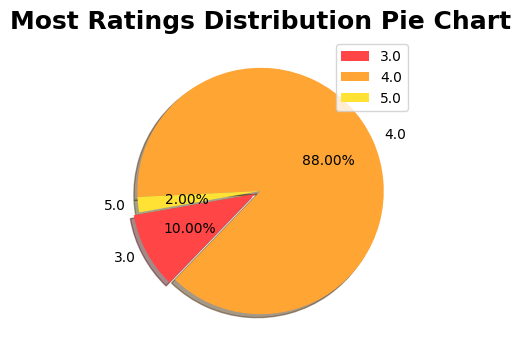

In [102]:
plt.figure(figsize = (10,4))
plt.pie(data['Rating'].value_counts().sort_index(),
       labels=data['Rating'].value_counts().sort_index().index,explode = [0.05,0.0,0.00],autopct= '%.2f%%',
       colors = ["#ff4545", "#ffa534",'#ffe234'], shadow= True, startangle= 190)

plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, 'Most Purchase Month Distribution')

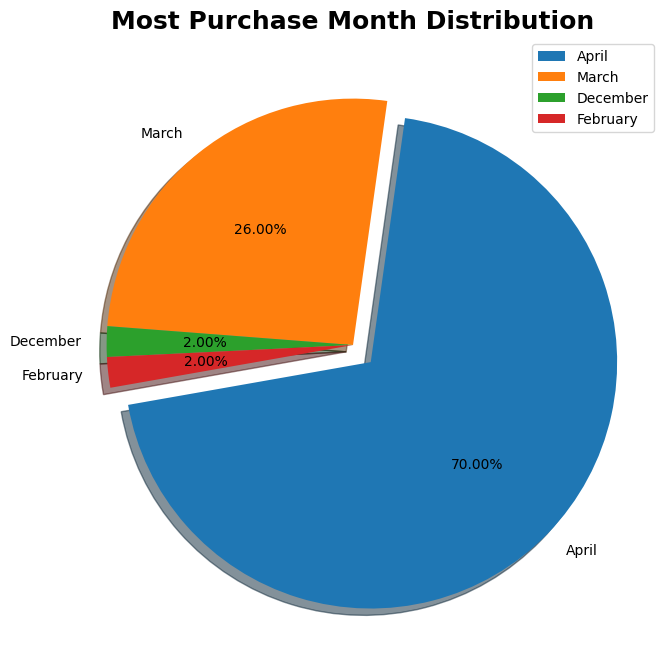

In [105]:
plt.figure(figsize = (10,8))
plt.pie(data['month'].value_counts(),
       labels=data['month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190)
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')

In [111]:
amazon_data = pd.DataFrame(data['Review'])
amazon_data.head()

,Review
0,I am writing this review after seven days of u...
1,The Phone is very good at this price point no ...
2,The varient which i got is it only have 4 gb o...
3,Product is meets with the all the expectation ...
4,"Product is very good , but you have to comprom..."


In [112]:
# Removing @username
amazon_data['Clean_Reviews'] = np.vectorize(remove_pattern)(amazon_data['Review'], "@[\w]*")

In [114]:
# Removing links
cleaned_reviews = []

for index, row in amazon_data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

amazon_data['Clean_Reviews'] = cleaned_reviews

In [115]:
# removing review with empty text
amazon_data = amazon_data[amazon_data['Clean_Reviews']!='']

In [116]:
# dropping duplicate rows
amazon_data.drop_duplicates(subset=['Clean_Reviews'], keep=False)

,Review,Clean_Reviews
0,I am writing this review after seven days of u...,I am writing this review after seven days of u...
1,The Phone is very good at this price point no ...,The Phone is very good at this price point no ...
2,The varient which i got is it only have 4 gb o...,The varient which i got is it only have 4 gb o...
3,Product is meets with the all the expectation ...,Product is meets with the all the expectation ...
4,"Product is very good , but you have to comprom...","Product is very good , but you have to comprom..."
5,It got it at 7.5k and it's good for this price...,It got it at 7.5k and it's good for this price...
6,Ok,Ok
7,Had this phone for about 2-3 day and here is m...,Had this phone for about 2-3 day and here is m...
8,he mobile has a very decent speed. Value for m...,he mobile has a very decent speed. Value for m...
9,Good low budget smartphone,Good low budget smartphone


In [117]:
# resetting index
amazon_data = amazon_data.reset_index(drop=True)

In [120]:
# Removing punctuation, Numbers and special character
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
amazon_data['Clean_Reviews'] = amazon_data['Clean_Reviews'].apply(lambda x: clean_text(x))

# Remove emotions
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon_data['Clean_Reviews']=amazon_data['Clean_Reviews'].apply(lambda x: remove_emoji(x))

In [121]:
# Removing stopwords
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()

In [127]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_review = []

for index, row in amazon_data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_review.append(' '.join(words_without_stopwords))
    
amazon_data['Clean_Reviews'] = cleaned_review
amazon_data.head()

,Review,Clean_Reviews
0,I am writing this review after seven days of u...,writing review seven days using phone phone bu...
1,The Phone is very good at this price point no ...,phone good price point complains display goodc...
2,The varient which i got is it only have 4 gb o...,varient got gb ramit cannot expandable upto bu...
3,Product is meets with the all the expectation ...,product meets expectation addition camerabatte...
4,"Product is very good , but you have to comprom...",product good compromise processor good elder p...


## Feature Extraction for key words

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(amazon_data['Clean_Reviews'])

## get sentiments

Using NLTK's SentimentIntenityAnalyzer (We will refer it as SIA)

In [132]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [133]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments_using_SIA = amazon_data.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,50


In [135]:
amazon_data.Clean_Reviews[10]

'nice product budget price'

In [136]:
sid = SentimentIntensityAnalyzer()

In [139]:
df=pd.DataFrame()
df['Clean_Reviews'] = amazon_data['Clean_Reviews']
df['scores'] = amazon_data['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Clean_Reviews,scores,compound
0,writing review seven days using phone phone bu...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.8860
1,phone good price point complains display goodc...,"{'neg': 0.128, 'neu': 0.571, 'pos': 0.302, 'co...",0.7506
2,varient got gb ramit cannot expandable upto bu...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.3252
3,product meets expectation addition camerabatte...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.4215
4,product good compromise processor good elder p...,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp...",0.7003


In [140]:
df['compound'].values

array([0.886 , 0.7506, 0.3252, 0.4215, 0.7003, 0.9332, 0.296 , 0.9201,
       0.7269, 0.2023, 0.4215, 0.    , 0.2732, 0.4404, 0.4404, 0.4404,
       0.4215, 0.    , 0.34  , 0.296 , 0.3899, 0.4215, 0.6808, 0.    ,
       0.    , 0.4215, 0.    , 0.7269, 0.6369, 0.4404, 0.    , 0.1531,
       0.34  , 0.7003, 0.9136, 0.    , 0.34  , 0.4404, 0.4404, 0.8225,
       0.7845, 0.5563, 0.    , 0.    , 0.1779, 0.4404, 0.    , 0.4939,
       0.9538, 0.9686])

In [141]:
sentiment = []
for c in (df['compound'].values):
    if c >= 0.05:
        sentiment.append('positive')
    elif c <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

sentiment

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive']

In [142]:
df['sentiment'] = sentiment 
df.head()

,Clean_Reviews,scores,compound,sentiment
0,writing review seven days using phone phone bu...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.8860,positive
1,phone good price point complains display goodc...,"{'neg': 0.128, 'neu': 0.571, 'pos': 0.302, 'co...",0.7506,positive
2,varient got gb ramit cannot expandable upto bu...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.3252,positive
3,product meets expectation addition camerabatte...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.4215,positive
4,product good compromise processor good elder p...,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp...",0.7003,positive


In [143]:
df['sentiment'].value_counts()

positive    40
neutral     10
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

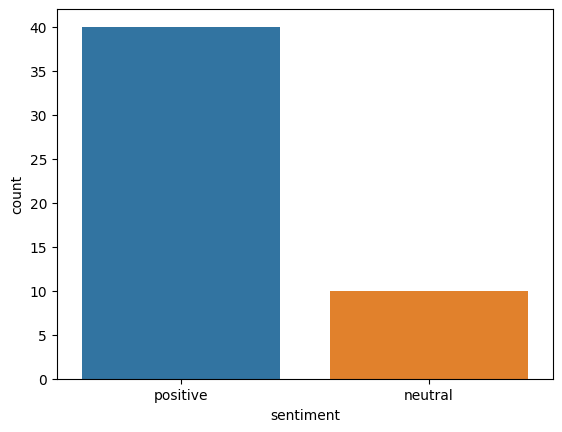

In [144]:
import seaborn as sns
sns.countplot(data=df,x='sentiment')

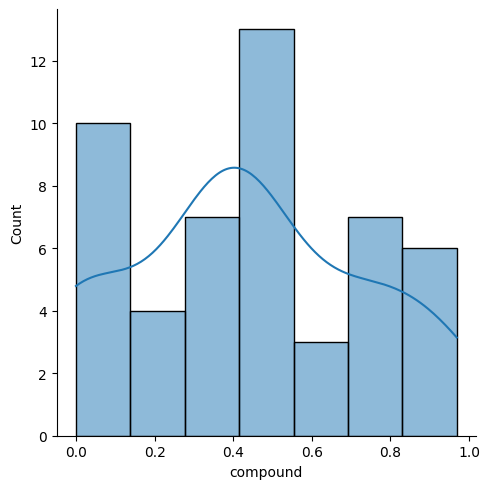

In [145]:
sns.displot(df['compound'],kde=True)

## Most common words in positive review

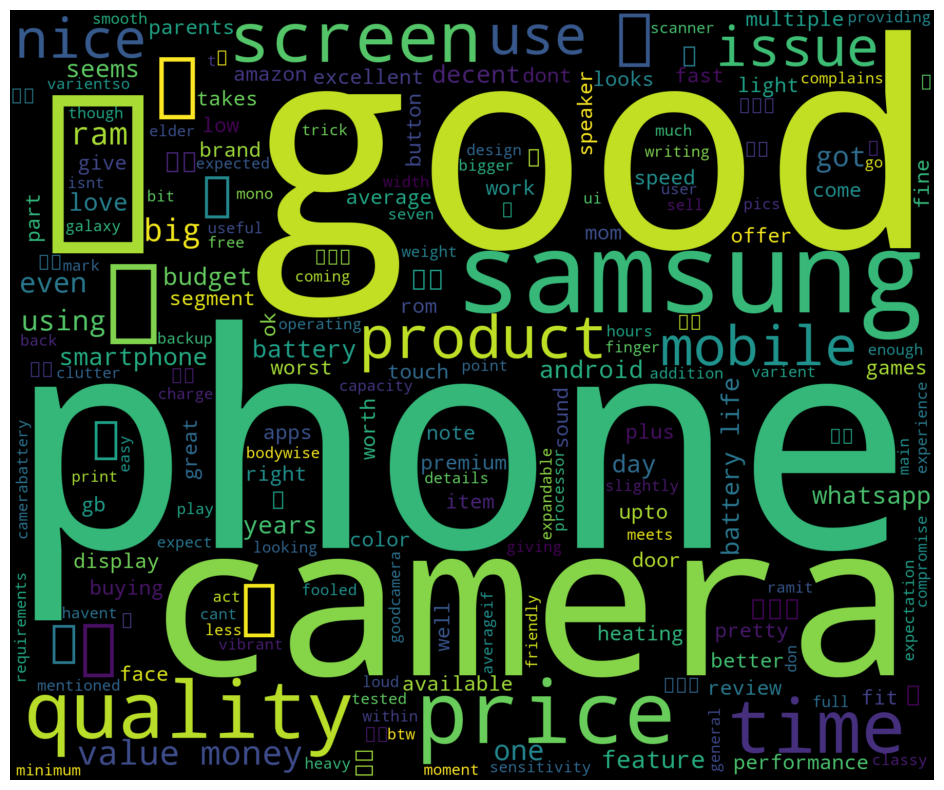

In [150]:
from wordcloud import WordCloud
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=1800, height=1500).generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

all_words = ' '.join([text for text in df['Clean_Reviews'][df['sentiment'] == 'positive']])
generate_wordcloud(all_words)